# Decision Tree Classification

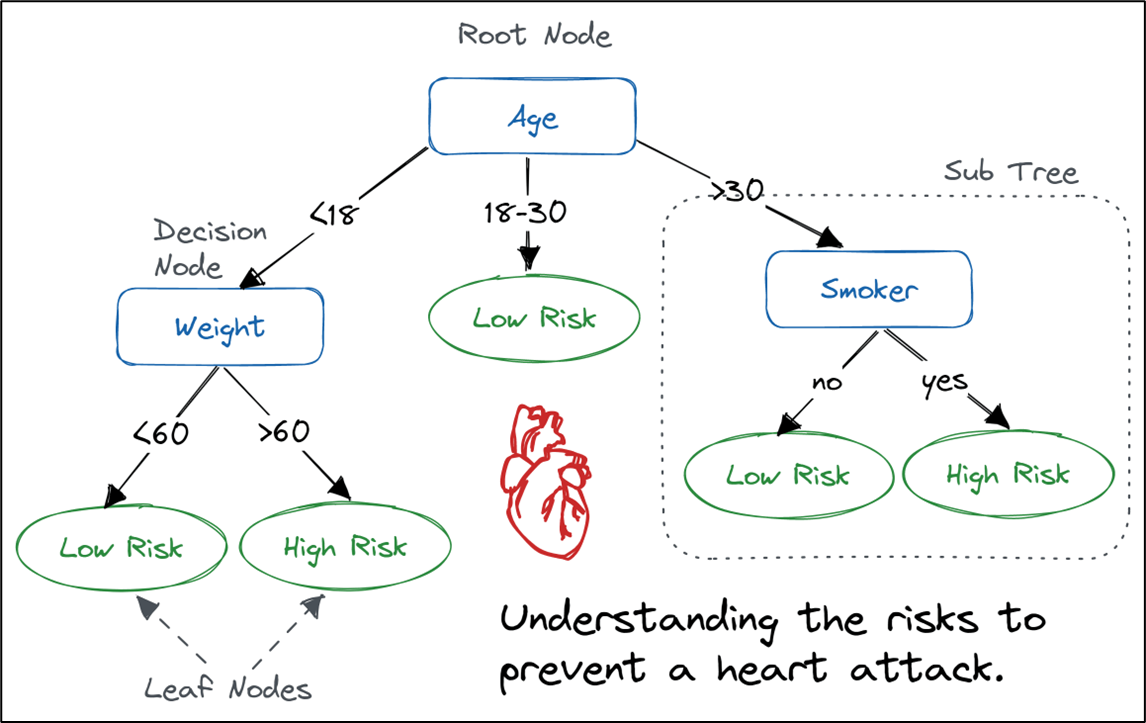

## CART - Classification and Regression Trees

In [1]:
from warnings import filterwarnings

filterwarnings("ignore")

# Step 1 - Data Ingestion

In [2]:
import pandas as pd

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Target feature is Drug

In [3]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [4]:
df["Drug"].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

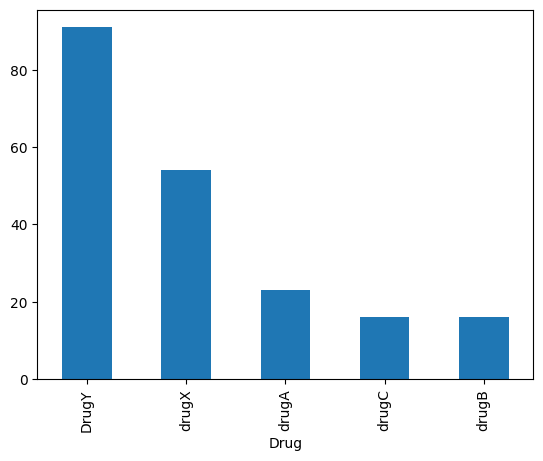

In [5]:
df["Drug"].value_counts().plot(kind="bar")

# Step 2 - Perform basic data quality checks

In [6]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Step 3 - Seperate X and Y

In [9]:
X = df.drop(columns=["Drug"])
Y = df[["Drug"]]

In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


# Step 4 - Apply Preprocessing on X

In [12]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [16]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [17]:
cat

['Sex', 'BP', 'Cholesterol']

In [18]:
con

['Age', 'Na_to_K']

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [15]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"),
)

In [ ]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con), 
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,0.0,0.0,0.0,0.0
1,0.162699,-0.415145,1.0,1.0,0.0,0.0
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
3,-0.988614,-1.149963,0.0,0.0,1.0,0.0
4,1.011034,0.271794,0.0,1.0,0.0,0.0


In [21]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

# Step 5 - Train Test Split
test - 0.2 - 0.4

In [22]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, test_size=0.4, random_state=42
)

In [23]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.162699,-0.828558,1.0,1.0,0.0,0.0
77,-1.109805,0.426945,0.0,0.0,0.0,1.0
46,-0.443255,-0.415423,0.0,0.0,0.0,0.0
187,0.162699,-0.788452,1.0,0.0,0.0,0.0
191,-1.291591,-1.120403,1.0,0.0,0.0,0.0


In [24]:
ytrain.head()

,Drug
2,drugC
77,DrugY
46,drugA
187,drugA
191,drugA


In [25]:
xtest.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.503851,-0.646762,1.0,1.0,0.0,1.0
15,-1.715759,-0.078892,0.0,0.0,0.0,1.0
30,-1.594568,-1.017848,0.0,0.0,1.0,1.0
158,0.889843,-0.782762,0.0,1.0,0.0,0.0
128,0.162699,2.422679,1.0,1.0,0.0,1.0


In [26]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [27]:
xtrain.shape

(120, 6)

In [28]:
xtest.shape

(80, 6)

# Step 6 - Model Building

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier(
    max_depth=1, min_samples_split=5, min_samples_leaf=5, criterion="gini"
)

model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5)

In [31]:
model.score(xtrain, ytrain)

0.725

In [32]:
model.score(xtest, ytest)

0.725

# Tuning the hyperparameters in model

In [33]:
params = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
}

In [34]:
params

{'max_depth': [2, 3, 4, 5],
 'min_samples_split': [5, 6, 7, 8],
 'min_samples_leaf': [5, 6, 7, 8],
 'criterion': ['gini', 'entropy']}

# Hyperparameter tuning techniques 
1. GridSearchCV - for tuning single value - Takes lot of time to tune because all possible combinations are checked
2. RandomisedSearchCV - for tuning multiple parameters, Paramaters are selected at random , takes less time to tune

In [35]:
from sklearn.model_selection import RandomizedSearchCV

base_dtc = DecisionTreeClassifier()
rscv = RandomizedSearchCV(
    estimator=base_dtc, param_distributions=params, cv=5, scoring="f1_macro", n_jobs=-1
)

rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': [5, 6, 7, 8],
                                        'min_samples_split': [5, 6, 7, 8]},
                   scoring='f1_macro')

In [36]:
rscv.best_params_

{'min_samples_split': 6,
 'min_samples_leaf': 6,
 'max_depth': 4,
 'criterion': 'gini'}

### Everyone might get different parameters than me

In [37]:
rscv.best_score_

np.float64(0.980952380952381)

In [38]:
best_dtc = rscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=6)

# Step 7 - Model Evaluation

In [39]:
# Train Accuracy
best_dtc.score(xtrain, ytrain)

1.0

In [40]:
# Test Accuracy
best_dtc.score(xtest, ytest)

1.0

In [41]:
ypred_test = best_dtc.predict(xtest)
ypred_test[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [42]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


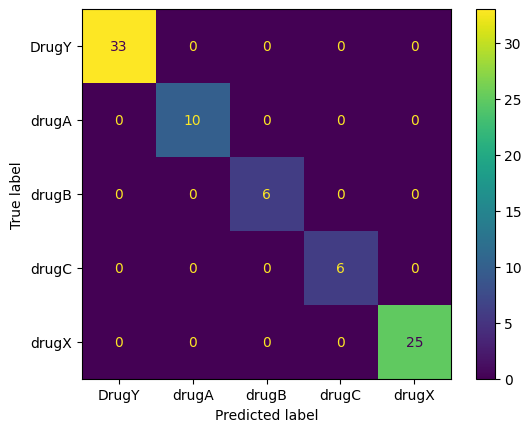

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtest, ytest)

In [44]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        33
       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring="f1_macro", n_jobs=-1)
scores

array([1.       , 1.       , 1.       , 0.9047619, 1.       ])

In [46]:
scores.mean()

np.float64(0.980952380952381)

# Above model is good and can be used for out of sample prediction

# Step 8 - Plot decision tree and check feature importances

In [47]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

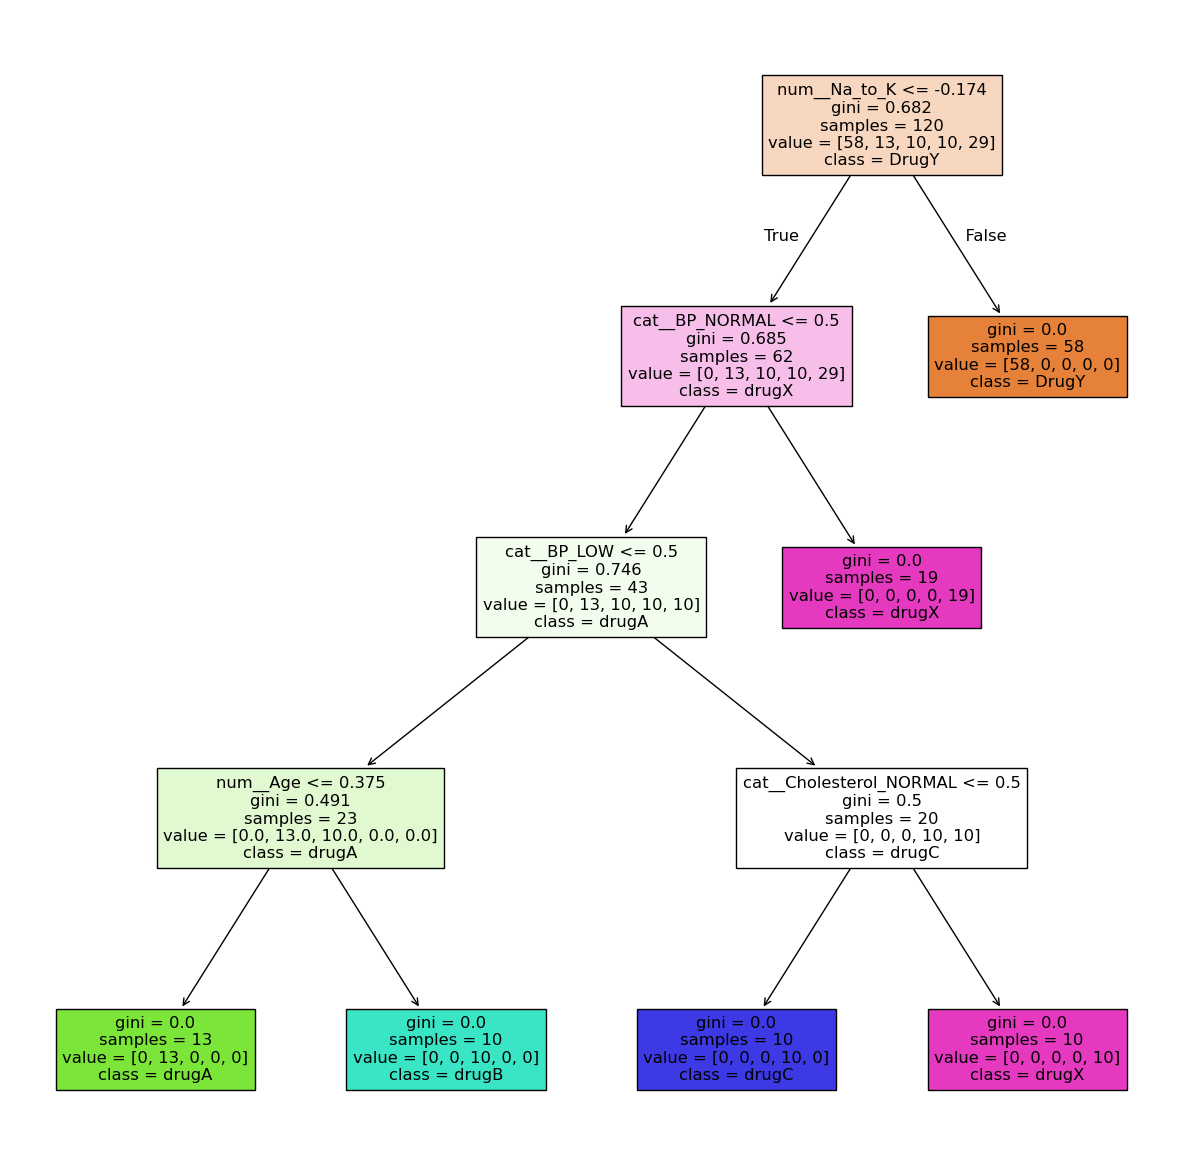

In [57]:
plt.figure(figsize=(15, 15))
plot_tree(
    best_dtc, class_names=best_dtc.classes_, feature_names=xtrain.columns, filled=True
)
plt.show()

In [54]:
ytrain.value_counts()

Drug 
DrugY    58
drugX    29
drugA    13
drugB    10
drugC    10
Name: count, dtype: int64

In [56]:
best_dtc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [58]:
best_dtc.feature_importances_

array([0.13805432, 0.48116583, 0.        , 0.13175667, 0.1268982 ,
       0.12212497])

In [59]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_M', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_NORMAL'],
      dtype='object')

In [61]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp

num__Age                   0.138054
num__Na_to_K               0.481166
cat__Sex_M                 0.000000
cat__BP_LOW                0.131757
cat__BP_NORMAL             0.126898
cat__Cholesterol_NORMAL    0.122125
dtype: float64

In [62]:
imp.sort_values(ascending=False)

num__Na_to_K               0.481166
num__Age                   0.138054
cat__BP_LOW                0.131757
cat__BP_NORMAL             0.126898
cat__Cholesterol_NORMAL    0.122125
cat__Sex_M                 0.000000
dtype: float64

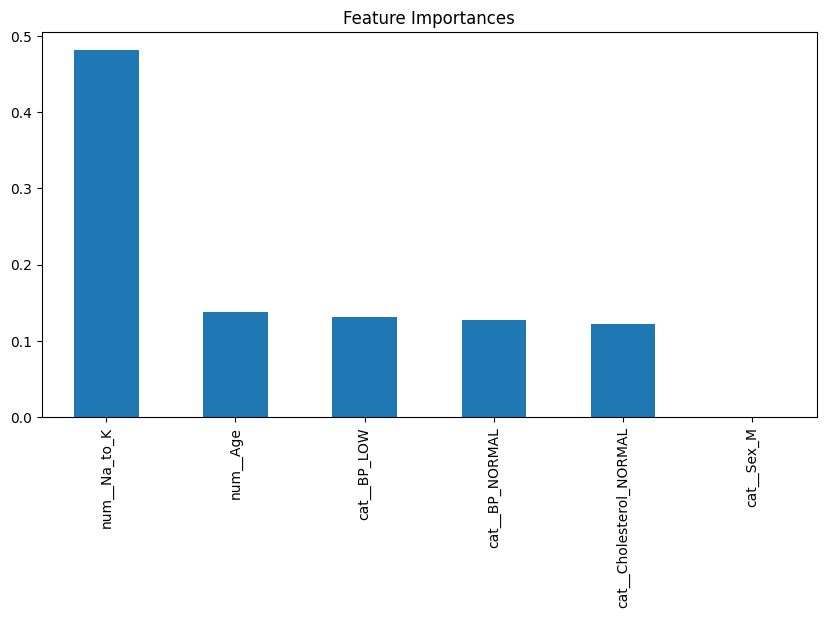

In [63]:
imp.sort_values(ascending=False).plot(
    kind="bar", figsize=(10, 5), title="Feature Importances"
)
plt.show()

# From above chart i can conclude that Na to K ratio is more important
# Gender is not relevant in prescribing the Medicines

# Step 9 - Out of Sample prediciton

In [65]:
xnew = pd.read_csv("drugtest.csv")
xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664


In [66]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [67]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.443255,-0.415423,0.0,0.0,0.0,0.0
1,0.041508,-0.442762,0.0,0.0,0.0,0.0
2,-1.291591,2.165111,1.0,0.0,0.0,0.0
3,-0.806828,1.981927,1.0,0.0,0.0,0.0
4,-0.322065,-0.891007,1.0,0.0,0.0,0.0


In [68]:
preds = best_dtc.predict(xnew_pre)
preds[0:5]

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA'], dtype=object)

In [69]:
probs = best_dtc.predict_proba(xnew_pre)
probs[0:5]

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [70]:
xnew["Drugs_pred"] = preds
xnew[best_dtc.classes_] = probs

In [71]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drugs_pred,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0,1.0,0.0,0.0,0.0
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0,1.0,0.0,0.0,0.0
2,23.0,M,NaN,HIGH,31.686,DrugY,1.0,0.0,0.0,0.0,0.0
3,31.0,M,HIGH,HIGH,30.366,DrugY,1.0,0.0,0.0,0.0,0.0
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0,1.0,0.0,0.0,0.0
5,16.0,M,LOW,HIGH,12.006,drugC,0.0,0.0,0.0,1.0,0.0
6,33.0,F,LOW,HIGH,NaN,drugC,0.0,0.0,0.0,1.0,0.0
7,59.0,M,HIGH,HIGH,NaN,drugB,0.0,0.0,1.0,0.0,0.0
8,68.0,M,LOW,HIGH,10.291,drugC,0.0,0.0,0.0,1.0,0.0
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0,0.0,0.0,0.0,1.0


In [72]:
xnew["Drugs_pred"].value_counts()

Drugs_pred
DrugY    24
drugX    11
drugA     7
drugC     7
drugB     1
Name: count, dtype: int64

In [73]:
xnew.to_csv("results.csv", index=False)

# Step 10 - Save the model object and preprocessor

In [74]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [75]:
best_dtc

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=6)

In [76]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [77]:
joblib.dump(best_dtc, "drugs_model.joblib")

['drugs_model.joblib']

# Load the objects from files

In [78]:
p = joblib.load("pre.joblib")
p

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [79]:
m = joblib.load("drugs_model.joblib")
m

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=6)

In [80]:
m.score(xtrain, ytrain)

1.0

In [81]:
m.score(xtest, ytest)

1.0